In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df = df_train = pd.read_csv('../churn_prediction_data/train.csv')
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,551,15806307,Trevisano,720,Spain,Male,38,5,114051.97,2,0,1,107577.29,0
1,6897,15709621,Martin,682,France,Female,54,4,62397.41,1,1,0,113088.60,1


In [4]:
lbe = LabelEncoder()
df_train['Geography'] = lbe.fit_transform(df_train['Geography'].astype(str))
df_train['Gender'] = lbe.fit_transform(df_train['Gender'].astype(str))

In [5]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,551,15806307,Trevisano,720,2,1,38,5,114051.97,2,0,1,107577.29,0
1,6897,15709621,Martin,682,0,0,54,4,62397.41,1,1,0,113088.60,1


In [6]:
train_data = df_train.loc[:, 'CreditScore': 'EstimatedSalary']
train_label = df_train['Exited']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(train_data, train_label, test_size = 0.25, random_state = 48)

In [8]:
scaler = StandardScaler()
x_train_standardized = scaler.fit_transform(x_train)
x_test_standardized = scaler.transform(x_test)

In [12]:
x_train_standardized.shape, y_train.shape

((6000, 10), (6000,))

In [13]:
from sklearn import svm
clf = svm.SVC()
clf = clf.fit(x_train_standardized, y_train)

/Users/zionn/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


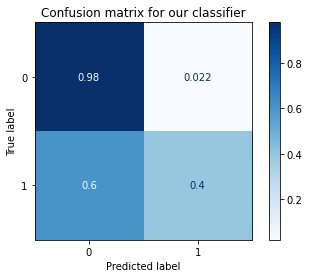

In [16]:
from sklearn.metrics import plot_confusion_matrix

predictions = clf.predict(x_test_standardized)
# Generate confusion matrix
matrix = plot_confusion_matrix(clf, x_test_standardized, y_test, cmap=plt.cm.Blues, normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [19]:
from sklearn.metrics import precision_score, accuracy_score, f1_score

accuracy_score(y_test, predictions)

0.8665

In [20]:
precision_score(y_test, predictions)

0.8148148148148148

In [22]:
f1_score(y_test, predictions)

0.5356521739130435

In [23]:
df_test = pd.read_csv('../churn_prediction_data/test.csv')
df_test.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,2209,15623595,Scott,726,France,Female,39,3,62397.41,1,0,0,106139.31
1,9924,15740283,Yegorova,661,France,Male,42,3,130339.64,1,1,0,125776.38


In [24]:
lbl = LabelEncoder()
df_test['Geography'] = lbl.fit_transform(df_test['Geography'].astype(str))
df_test['Gender'] = lbl.fit_transform(df_test['Gender'].astype(str))

In [25]:
df_test.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,2209,15623595,Scott,726,0,0,39,3,62397.41,1,0,0,106139.31
1,9924,15740283,Yegorova,661,0,1,42,3,130339.64,1,1,0,125776.38


In [26]:
x_hat_test = df_test.loc[:, 'CreditScore': 'EstimatedSalary']
x_hat_test_standardized = scaler.transform(x_hat_test)

In [27]:
y_hat_predictions_label = clf.predict(x_hat_test_standardized)
y_hat_predictions_label

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
df_upload = pd.DataFrame({
    'RowNumber': list(df_test.RowNumber), 
    'Exited': y_hat_predictions_label
})
df_upload

,RowNumber,Exited
0,2209,0
1,9924,0
2,4617,0
3,6077,0
4,9240,0
...,...,...
1995,7872,0
1996,4257,0
1997,2273,0
1998,315,0


In [29]:
df_upload.to_csv('../churn_prediction_data/SVM.csv')